In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aus_atp_final_2019 = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/points.csv')
aus_atp_final_2019.head()

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
0,0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0"
1,2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0"
2,4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0"
3,5,6,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0"
4,7,8,Nadal,Djokovic,Djokovic,out,second,7,7.20,0.50,18.67,"1:0, 15:0"


In [61]:
nadalwin = aus_atp_final_2019.loc[(aus_atp_final_2019['server']=='Nadal')
                                  &(aus_atp_final_2019['winner']=='Nadal'),'strokes']
djokovicwin = aus_atp_final_2019.loc[(aus_atp_final_2019['server']=='Djokovic')
                                     &(aus_atp_final_2019['winner']=='Djokovic'),'strokes']
nadallose = aus_atp_final_2019.loc[(aus_atp_final_2019['server']=='Nadal')
                                  &(aus_atp_final_2019['winner']=='Djokovic'),'strokes']
djokoviclose = aus_atp_final_2019.loc[(aus_atp_final_2019['server']=='Djokovic')
                                     &(aus_atp_final_2019['winner']=='Nadal'),'strokes']

- Choose one variable and plot that variable four different ways.

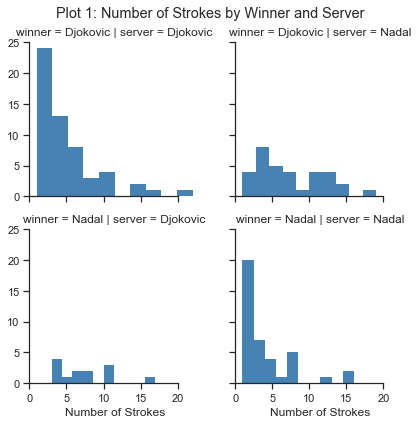

In [62]:
sns.set(style="ticks")  
g = sns.FacetGrid(aus_atp_final_2019, row="winner", col="server")
g.map(plt.hist, "strokes", color="steelblue",  lw=0)
plt.subplots_adjust(top=0.9)
g.set_axis_labels('Number of Strokes')
plt.suptitle('Plot 1: Number of Strokes by Winner and Server')
sns.despine(trim=True)
plt.show()

This plot can gives a good overview for the number of strokes for a different compinations of winner and server. We can understand that most of the time the winner is the server, and when the server is the winner he wins with less number of strokes compare to when he does not serve and win.

pros: subplots are scaled which is good for apple to apple comparision 

cons: This plot contains a lot of information and it is an overview. It is not easy to undertand, a more focused comparision is required

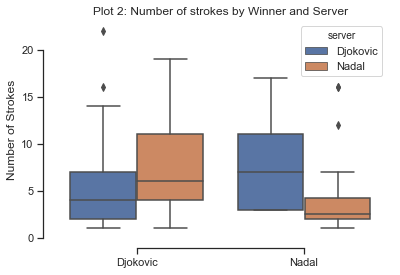

In [63]:
ax = sns.boxplot(x='winner',y='strokes',hue='server',data=aus_atp_final_2019)  
plt.title('Plot 2: Number of strokes by Winner and Server')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Number of Strokes')
plt.show()

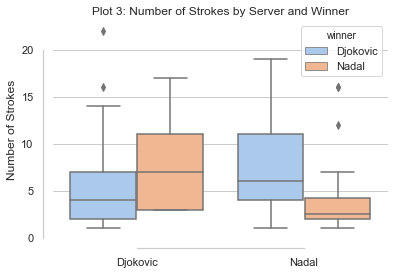

In [64]:
sns.set(style="whitegrid")
ax = sns.boxplot(x='server',y='strokes',hue='winner',data=aus_atp_final_2019,palette='pastel')  
plt.title('Plot 3: Number of Strokes by Server and Winner')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Number of Strokes')
plt.show()

The first plot support our finding from the previous plot. If the server is not the winner then the number of strokes is significantly higher. This case is more significant in the case of Nadal.

The second plot did not provide more information. It looks like the previous one.

Pros: It clearly show the difference of the number of strokes based on the winner and server, it was easy to see compare to the previous one

cons: More detailed comparision between Nadal and Djokovic regarding the number of strokes when they win and serve

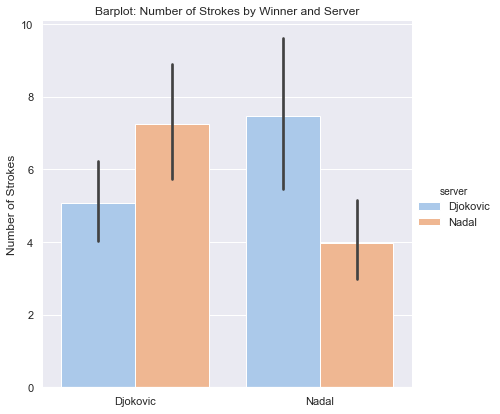

In [65]:
sns.set(style="darkgrid")
g = sns.catplot(x="winner", y="strokes", hue="server", data=aus_atp_final_2019,
                height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Number of Strokes")
g.set_xlabels("")
plt.title('Barplot: Number of Strokes by Winner and Server')
plt.show()

This one with the margin of err bar in the middle of the bars can help in making a comparision better than the previous plot. eventhough in average Nadal wins with less number of strokes when he serves but it is not significantly different from Djokovic.

pros: Margin of error line can help to make a better comparision between the bars and be sure to make a conclusion taking in consideration the margin of error and not only the average

cons: It still not the best to emphasize the difference. Average can mislead readers.

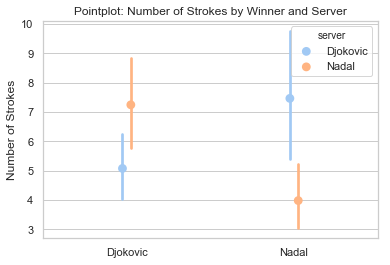

In [66]:
sns.set(style="whitegrid")
g = sns.pointplot(x="winner", y="strokes", hue="server", data=aus_atp_final_2019,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True, join=False)
g.set(ylabel='Number of Strokes')
g.set(xlabel="")
plt.title('Pointplot: Number of Strokes by Winner and Server')
plt.show()

THis is the best way to compare it shows the data as a line, the average is a dot and the margin of error is included. For Nadal the number of strokes is significantly higher when he win and not serve compare to the case when her serve. This is the case as well for Djokovic but the difference is not as significant as the case with Nadal.

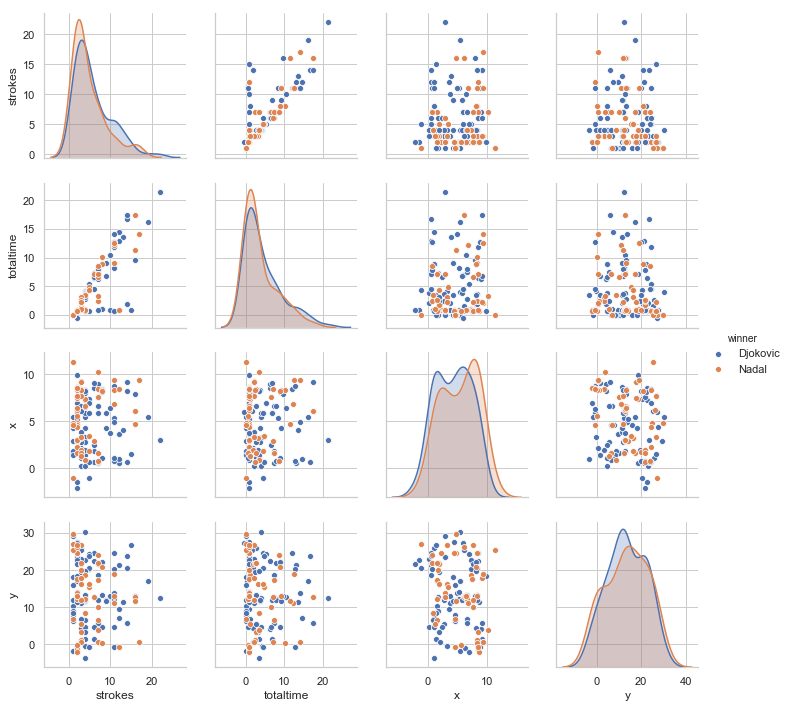

In [52]:
aus_atp_final_2019_v1=aus_atp_final_2019.drop(columns=['Unnamed: 0', 'rallyid'])
sns.pairplot(aus_atp_final_2019_v1, hue="winner")

It is good to plot a mster plot like this which cna show distributions and scatter of the data and check if there are trends between the varibables. This can help at the begaining of the analysis.

Number of strokes is more skewed to the right which means its usually less number of strokes per play which is normal in Tennis. There are a positive correlation between total time and number of strokes which is logic because more strokes should require more time of play. for other varibales no trend is clear.

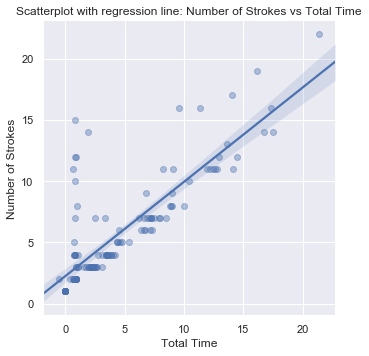

In [58]:
g = sns.lmplot(y='strokes', 
               x='totaltime',
               data=aus_atp_final_2019, 
               fit_reg=True,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Number of Strokes")
g.set_xlabels("Total Time")
plt.title('Scatterplot with regression line: Number of Strokes vs Total Time')
plt.show()

This lmplot shows the positive regression betwee the number of striokes and the total time. it supported our previous finidng

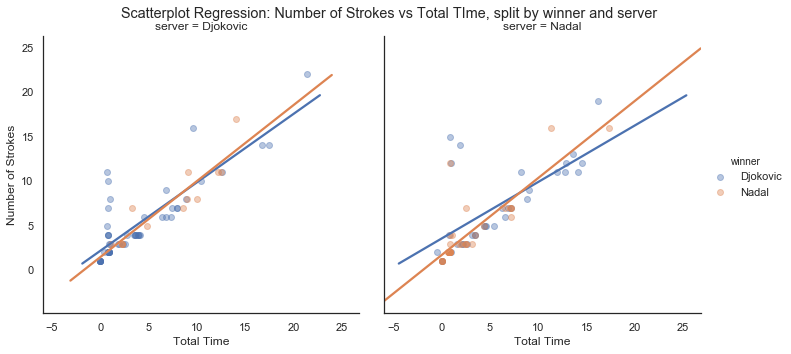

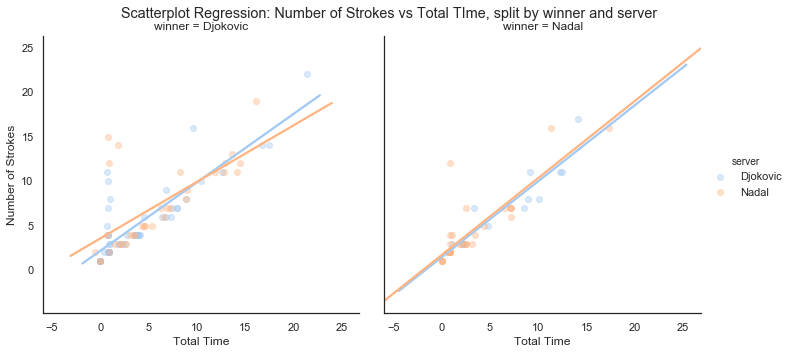

In [69]:
sns.set(style="white")

g = sns.lmplot(y='strokes', 
               x='totaltime',
               hue='winner',
               data=aus_atp_final_2019, 
               col='server',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Number of Strokes")
g.set_xlabels("Total Time")
plt.suptitle('Scatterplot Regression: Number of Strokes vs Total TIme, split by winner and server')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='strokes', 
               x='totaltime',
               hue='server',
               data=aus_atp_final_2019, 
               col='winner',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel')
g.set_ylabels("Number of Strokes")
g.set_xlabels("Total Time")
plt.suptitle('Scatterplot Regression: Number of Strokes vs Total TIme, split by winner and server')
plt.subplots_adjust(top=0.9)
plt.show()

This plot is more detailed lmplot shows the difference regression correlation based on who server and win. it shows the when Nadal is serving the number of strokes are done in less time compare to Djokovic when they win,  and when Djokovic serve it is the opposite.

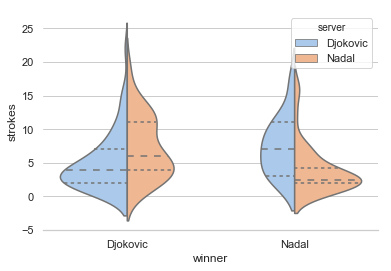

In [6]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="winner", y="strokes", hue="server",
               split=True, inner="quart",
               data=aus_atp_final_2019)
sns.despine(left=True)

This violin plot make better visulaization by showing how of the number of strokes divided by winner and server.
It shows that when the server is the winner the number of strokes most proberly will be less and this looks more obvoius with Nadal compare to Djokovic